In [1]:
import pandas as pd
import numpy as np

import torch

#imports necessary to define a neural network 
import torch.nn as nn
import torch.nn.functional as F

#ensure you are using GPU.
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  

device = torch.device(dev)
print(device)

dtype = torch.cuda.FloatTensor

cuda:0


In [39]:
import math

def vsfunc(alpha,kappa,epsilon,delt):
    
    tots=math.ceil(1/delt)
    delt=torch.tensor(delt).type(dtype)
    vs=torch.empty(tots,2).type(dtype)
    vsd=torch.tensor(0.00001).type(dtype)
    sd=torch.tensor(1).type(dtype)
    w=0
    while w<tots:
        vs[w,0]=sd
        vs[w,1]=vsd
        w = w + 1
        
        vsd = vsd - delt * (-1.0 + alpha * vsd / ((epsilon - vsd) * sd - kappa * vsd));
        sd = sd - delt
        
        if sd <= 0:
            sd = 0 
            vsd = 0
            
        if vsd < 0:
            vsd = 0
        
        if sd >= 1:
            sd = 1
            vsd = 0
            
        if vsd > 1: 
            vsd = 1
    
    return vs

In [40]:
a=vsfunc(torch.tensor([0.5]).type(dtype),torch.tensor([0.6]).type(dtype),torch.tensor([0.7]).type(dtype),0.001)

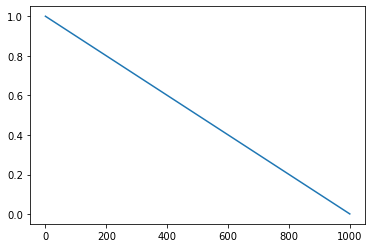

In [43]:
import matplotlib.pyplot as plt

plt.plot(a[:,0].detach().cpu().numpy())

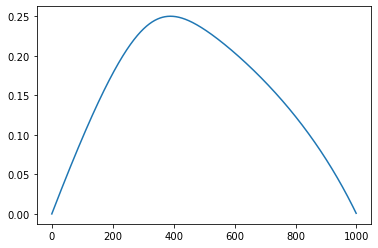

In [44]:
import matplotlib.pyplot as plt

plt.plot(a[:,1].detach().cpu().numpy())

In [130]:
class Net1(nn.Module):

    def __init__(self):
        super(Net1, self).__init__()
        
        # an affine operation: y = Wx + b
        
        self.rand=nn.Linear(30,16).cuda()
        self.fc6 = nn.Linear(16,3).cuda()
        
    def forward(self, x):
        x = self.rand(x).cuda()
        x = F.relu(x).cuda()    
        x = self.fc6(x).cuda()
        
        return x

net = Net1()

#use gpu for all computations in model
net.cuda()
print(net)

Net1(
  (rand): Linear(in_features=30, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=3, bias=True)
)


In [85]:
import pandas as pd
import numpy as np

data=pd.read_csv('C:/Users/Ant Pc/Theoritical Biophysics/Quiz 1/ME17B037_QI.csv')

def customloss(matr):
    
    criterion = nn.MSELoss()

    d1=data.values[:,0]
    d2=data.values[:,1]
    
    d1=torch.from_numpy(d1).type(dtype)
    d2=torch.from_numpy(d2).type(dtype)
    
    a=vsfunc(matr[0,0],matr[0,1],matr[0,2],0.001)
    
    a1=a[:,0]
    a2=a[:,1]
    
    e1=criterion(a1,d1).type(dtype)
    e2=criterion(a2,d2).type(dtype)
    
    return (e1+e2)

In [122]:
#random input matrix
nsamples=1
X=np.random.randn(nsamples,30)

Xtensor=torch.from_numpy(X).type(dtype)
print(Xtensor[:,0:30])

tensor([[ 0.1208, -0.9076,  0.9718, -1.0079, -0.2626, -0.8146,  0.1648, -0.4968,
          1.5328, -0.9653,  0.6601,  0.3094,  0.4087,  0.8985,  0.5685, -0.9674,
         -0.6537,  0.8983, -2.1211, -1.6282, -0.3415,  1.2303,  0.6838, -1.3971,
         -0.2631, -0.7115,  0.1173,  1.2319, -0.6569,  0.6462]],
       device='cuda:0')


In [131]:
#trainingloop
import torch.optim as optim

lr = 0.0001
batchsize=1

batches=nsamples/batchsize

epochs=20000

# create your optimizer
optimizer = optim.Adagrad(net.parameters(), lr)

for i in range(epochs):
    
    for j in range(int(batches)):
        
        #forward pass
        out=net(Xtensor[j:j+batchsize,:]).type(dtype)
    
        #compute loss
        loss = customloss(out).type(dtype)

        #backprop loss i.e. find dloss/dparam for each parameter and store.
        loss.backward(retain_graph=True)
        
        #clip gradients
        torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
        optimizer.step()
    print(loss,i)

tensor(0.2249, device='cuda:0', grad_fn=<AddBackward0>) 0
tensor(0.1513, device='cuda:0', grad_fn=<AddBackward0>) 1
tensor(0.2068, device='cuda:0', grad_fn=<AddBackward0>) 2
tensor(0.1398, device='cuda:0', grad_fn=<AddBackward0>) 3
tensor(0.2595, device='cuda:0', grad_fn=<AddBackward0>) 4
tensor(0.1576, device='cuda:0', grad_fn=<AddBackward0>) 5
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 6
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 7
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 8
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 9
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 10
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 11
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 12
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 13
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 14
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 15
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 16
tensor(

tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 139
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 140
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 141
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 142
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 143
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 144
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 145
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 146
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 147
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 148
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 149
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 150
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 151
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 152
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 153
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 154
tensor(0.1473, device='cuda:0', grad_fn=

tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 276
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 277
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 278
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 279
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 280
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 281
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 282
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 283
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 284
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 285
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 286
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 287
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 288
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 289
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 290
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 291
tensor(0.1473, device='cuda:0', grad_fn=

tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 413
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 414
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 415
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 416
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 417
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 418
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 419
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 420
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 421
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 422
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 423
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 424
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 425
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 426
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 427
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 428
tensor(0.1473, device='cuda:0', grad_fn=

tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 550
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 551
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 552
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 553
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 554
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 555
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 556
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 557
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 558
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 559
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 560
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 561
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 562
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 563
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 564
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 565
tensor(0.1473, device='cuda:0', grad_fn=

tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 687
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 688
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 689
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 690
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 691
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 692
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 693
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 694
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 695
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 696
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 697
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 698
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 699
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 700
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 701
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 702
tensor(0.1473, device='cuda:0', grad_fn=

tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 824
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 825
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 826
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 827
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 828
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 829
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 830
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 831
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 832
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 833
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 834
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 835
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 836
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 837
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 838
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 839
tensor(0.1473, device='cuda:0', grad_fn=

tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 961
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 962
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 963
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 964
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 965
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 966
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 967
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 968
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 969
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 970
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 971
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 972
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 973
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 974
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 975
tensor(0.1473, device='cuda:0', grad_fn=<AddBackward0>) 976
tensor(0.1473, device='cuda:0', grad_fn=

KeyboardInterrupt: 

In [96]:
a=net(Xtensor).detach().cpu().numpy()
print(a)

[[0.71792775 0.782643   0.91273224]]


In [129]:
a=net(Xtensor).detach().cpu().numpy()
print(a)

[[-90.50047  -85.01975  -83.762764]]


In [103]:
#trainingloop
import torch.optim as optim
#30,64
lr = 0.01
batchsize=1

batches=nsamples/batchsize

epochs=20000

# create your optimizer
optimizer = optim.Adagrad(net.parameters(), lr)

for i in range(epochs):
    
    for j in range(int(batches)):
        
        #forward pass
        out=net(Xtensor[j:j+batchsize,:]).type(dtype)
    
        #compute loss
        loss = customloss(out).type(dtype)

        #backprop loss i.e. find dloss/dparam for each parameter and store.
        loss.backward(retain_graph=True)
        
        #clip gradients
        torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
        optimizer.step()
    print(loss,i)

tensor(5.5421e-05, device='cuda:0', grad_fn=<AddBackward0>) 0
tensor(5.5887e-05, device='cuda:0', grad_fn=<AddBackward0>) 1
tensor(5.6257e-05, device='cuda:0', grad_fn=<AddBackward0>) 2
tensor(5.6580e-05, device='cuda:0', grad_fn=<AddBackward0>) 3
tensor(5.6870e-05, device='cuda:0', grad_fn=<AddBackward0>) 4
tensor(5.7137e-05, device='cuda:0', grad_fn=<AddBackward0>) 5
tensor(5.7383e-05, device='cuda:0', grad_fn=<AddBackward0>) 6
tensor(5.7613e-05, device='cuda:0', grad_fn=<AddBackward0>) 7
tensor(5.7830e-05, device='cuda:0', grad_fn=<AddBackward0>) 8
tensor(5.8032e-05, device='cuda:0', grad_fn=<AddBackward0>) 9
tensor(5.8223e-05, device='cuda:0', grad_fn=<AddBackward0>) 10
tensor(5.8404e-05, device='cuda:0', grad_fn=<AddBackward0>) 11
tensor(5.8575e-05, device='cuda:0', grad_fn=<AddBackward0>) 12
tensor(5.8737e-05, device='cuda:0', grad_fn=<AddBackward0>) 13
tensor(5.8890e-05, device='cuda:0', grad_fn=<AddBackward0>) 14
tensor(5.9036e-05, device='cuda:0', grad_fn=<AddBackward0>) 15
te

KeyboardInterrupt: 